<a href="https://colab.research.google.com/github/JMML2021/Avaluaci-final-per-passar-a-projecte/blob/main/Companyia%20Aerea%20Algoritmes%20d%E2%80%99aprenentatge%20supervisat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/Ficheros de Vueling/2022-09-20 14:39:04.960091 FLT_2022.xlsx

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [59]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Abro el fichero
''' 
path = ('/content/drive/MyDrive/Ficheros de Vueling/2022-09-20 14:39:04.960091 FLT_2022.xlsx')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]
'''

' \npath = (\'/content/drive/MyDrive/Ficheros de Vueling/2022-09-20 14:39:04.960091 FLT_2022.xlsx\')\n\n    \ndf=  pd.read_csv(path, sep=\',\', encoding="latin-1")\ndf.shape\n\nnRow, nCol = df.shape\nprint(f\'Hay  {nRow} filas con {nCol} columnas\')\ndf1=df.copy()\nprint(\'\nImprimo el primer registro, solo para ver como es:\n\')\ndf1.iloc[0]\n'

In [5]:
# Abrir fichero de Github.
#path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'
Hoja = 'FLT_2022'
path = ('/content/drive/MyDrive/Ficheros de Vueling/2022-09-20 14:39:04.960091 FLT_2022.xlsx')

df = pd.read_excel(path) #, sheet_name=Hoja)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       12358 non-null  int64         
 1   DATE                             12358 non-null  datetime64[ns]
 2   FLT                              12358 non-null  object        
 3   REG                              12358 non-null  object        
 4   AC                               12358 non-null  object        
 5   DEP                              12358 non-null  object        
 6   ARR                              12358 non-null  object        
 7   STD                              12358 non-null  datetime64[ns]
 8   STA                              12358 non-null  datetime64[ns]
 9   TKof                             12358 non-null  datetime64[ns]
 10  TDwn                             12358 non-null  datetime6

In [62]:
df1=df[['Puntualidad1', 'Puntualidad2', 'Puntualidad3', 
        'E_Despegue','E_Despegue2','E_Despegue3',
        'E_Duracion_Vuelo','E_Duracion_Vuelo2','E_Duracion_Vuelo3']]

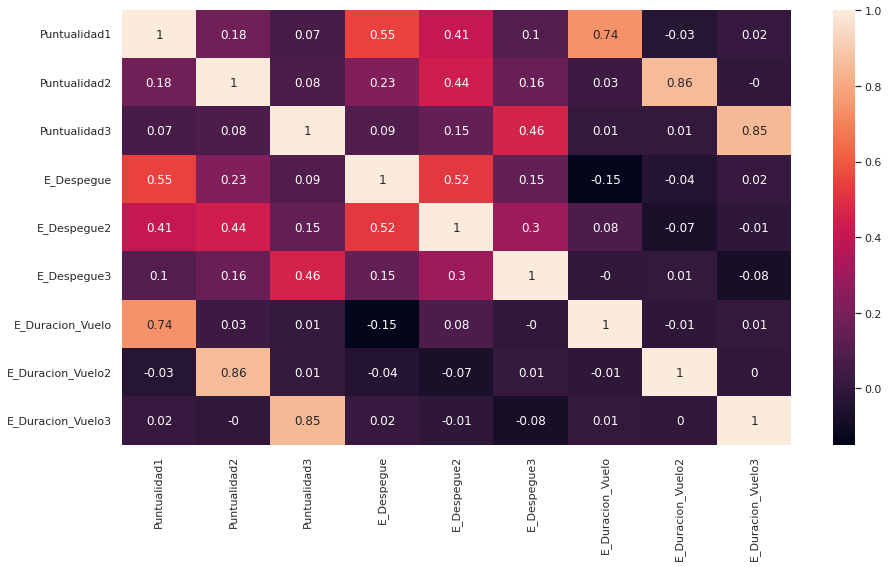

In [63]:
# Creo la matriz de correlacion entre todos los factores.

correlation_matrix = df1.corr().round(2) 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

In [64]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([(df1.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df1.copy(), 4)
df1_StdScaler= pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

df1_StdScaler.head()

,Puntualidad1,Puntualidad2,Puntualidad3,E_Despegue,E_Despegue2,E_Despegue3,E_Duracion_Vuelo,E_Duracion_Vuelo2,E_Duracion_Vuelo3
0,0.661875,0.158984,-0.020942,1.006091,0.398530,-0.039738,-0.022665,-0.049533,0.000086
1,-0.620447,-0.405877,-0.020942,-0.939568,-0.840450,-0.655431,0.018437,0.025896,0.365863
2,0.245987,0.204173,-0.169253,0.340471,0.133034,-0.095710,0.018437,0.151611,-0.132924
3,0.800504,0.000823,-0.525200,1.159696,0.575527,-0.543487,0.018437,-0.326106,-0.265933
4,0.176672,-0.134744,-0.050604,-0.222746,-0.530705,-0.263626,0.388352,0.151611,0.099843


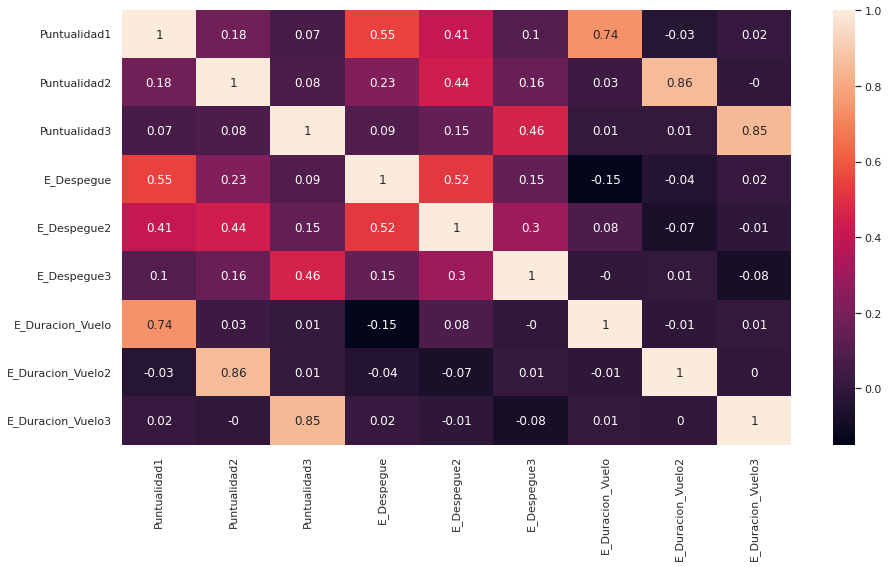

In [65]:
# Creo la matriz de correlacion entre todos los factores.

correlation_matrix = df1_StdScaler.corr().round(2) 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3508aab390>,
      dtype=object)

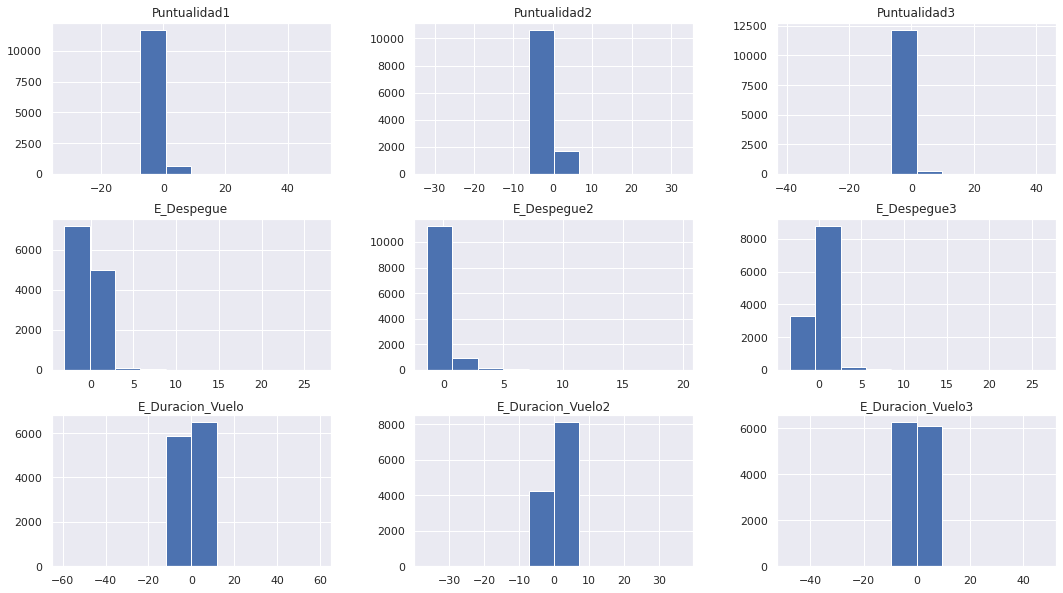

In [66]:
# Con los datos transformados veo si ha cambiado mucho la forma de cada variable
df1_StdScaler[df1_StdScaler.columns].hist(figsize=(18,10))

# Trec els outliers

In [67]:
# Elimino los outliers
df2=df1.copy()
dfEliminarOutliers= ((df2['E_Despegue']> -30) & 
                     (df2['E_Despegue']< 30) & 
                     (df2['Puntualidad1']< 30) & 
                     (df2['Puntualidad1']>-30) &
                     (df2['Puntualidad2']< 30) & 
                     (df2['Puntualidad2']>-30)&
                     (df2['E_Despegue2']< 30) & 
                     (df2['E_Despegue2']>-30)&
                     (df2['Puntualidad3']< 30) & 
                     (df2['Puntualidad3']>-30)&
                     (df2['E_Despegue3']< 30) & 
                     (df2['E_Despegue3']>-30))

df2 = df2[dfEliminarOutliers]

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 59 to 12291
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Puntualidad1       351 non-null    float64
 1   Puntualidad2       351 non-null    int64  
 2   Puntualidad3       351 non-null    int64  
 3   Puntualidad4       351 non-null    int64  
 4   E_Despegue         351 non-null    int64  
 5   E_Despegue2        351 non-null    int64  
 6   E_Despegue3        351 non-null    float64
 7   E_Duracion_Vuelo   351 non-null    float64
 8   E_Duracion_Vuelo2  351 non-null    int64  
 9   E_Duracion_Vuelo3  351 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 30.2 KB


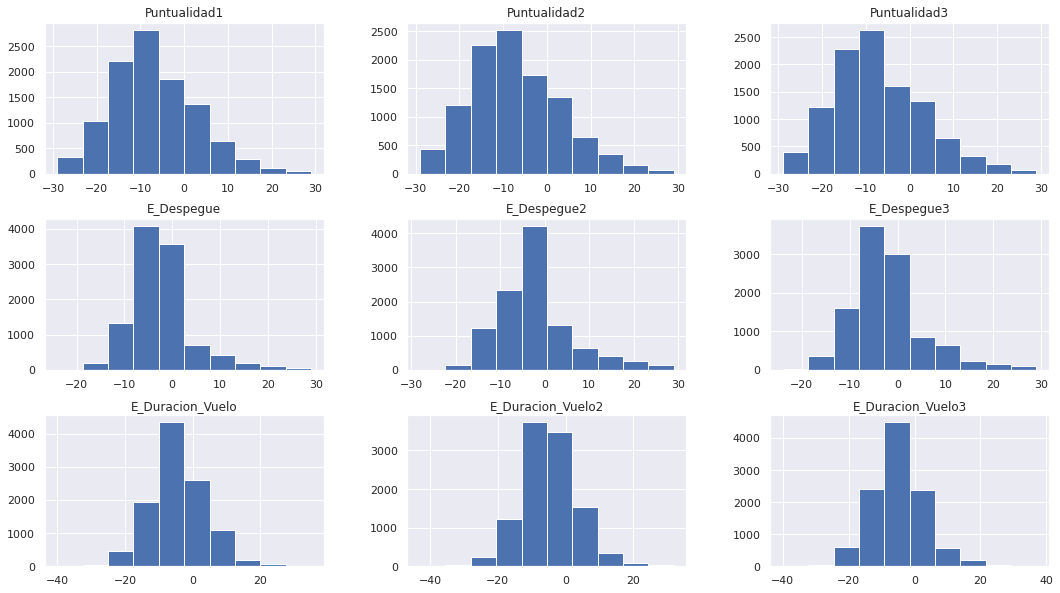

In [70]:
# Con los datos transformados veo si ha cambiado mucho la forma de cada variable
ax= df2[df2.columns].hist(figsize=(18,10))
 

In [57]:
#Import sl transformacion StandScaler
from sklearn.preprocessing import StandardScaler

#Separamosla columna "target".
x = df2.loc[:,df2.columns != 'Puntualidad3'].values
y = df2.loc[:,['Puntualidad3']].values

#Transformamos los datos
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)
# creamos el PCA:
pca = PCA(n_components=2)

#Obtenemos el PCA.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,3.725461,0.052040
1,-3.405470,0.760209
2,2.087433,-0.880963
3,3.847001,1.561038
4,0.077011,0.533647


NameError: ignored

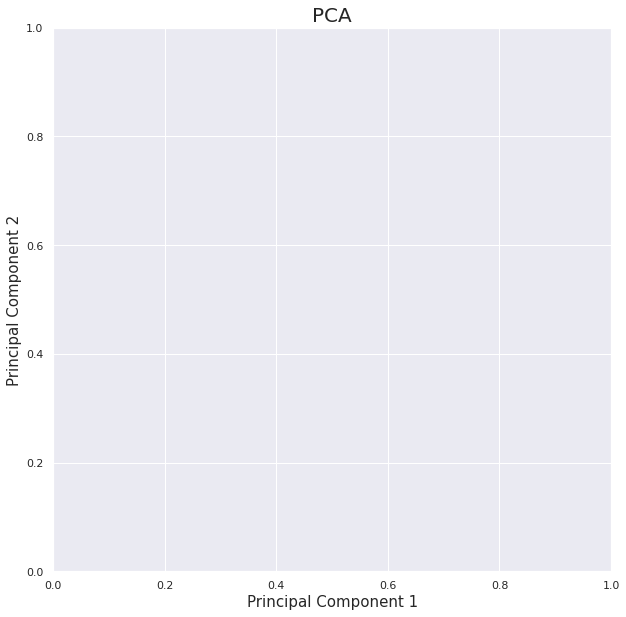

In [58]:
# Mostramos los graficos
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Unir de nuevo la variable objetivo

finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()